In [48]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [90]:
pwd

'C:\\Users\\skesh'

In [92]:
data = pd.read_excel('C:/Users/skesh/Imarticus/Notebooks/Model_Data.xlsx')

In [93]:
df = data.iloc[:,1:]
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,4.060000,2.00,0.250000,0.5,0,48.0,NaN,NaN,NaN,NaN,0.136364,NaN,NaN,NaN,0.00,0
1,5.046588,7.00,0.823529,1.0,19,1.0,25.0,8.0,7.0,0.001703,0.002841,0.003618,0.002206,0.000255,0.75,232
2,4.531578,3.40,0.812500,0.8,1,NaN,153.0,48.0,539.0,0.000090,NaN,0.022142,0.013238,0.019623,0.82,348
3,3.990000,5.43,0.562500,0.6,12,0.0,0.0,10.0,33.0,0.001076,NaN,NaN,0.002758,0.001201,0.55,131
4,4.060000,3.20,0.705882,1.0,25,2.0,1.0,4.0,1017.0,0.002241,0.005682,0.000145,0.001103,0.037025,0.58,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4.229898,2.53,0.750000,1.0,187,1.0,147.0,46.0,4447.0,0.016765,0.002841,0.021274,0.012686,0.161897,0.64,338
64,5.180000,2.53,0.812500,1.0,380,2.0,116.0,103.0,3561.0,0.034068,0.005682,0.016787,0.028406,0.129642,0.73,650
65,4.229898,3.93,0.823529,0.8,46,2.0,2.0,NaN,5537.0,0.004124,0.005682,0.000289,NaN,0.201580,0.83,253
66,4.393713,6.40,0.875000,1.0,2240,9.0,695.0,31.0,104.0,0.200825,0.025568,0.100579,0.008549,0.003786,0.82,520


In [94]:
df.shape

(68, 16)

In [95]:
df.isnull().sum()

F1      0
F2      0
F3      0
F4      1
F5      0
F6      9
F7     23
F8     24
F9     11
F10    16
F11    19
F12    30
F13    26
F14    25
F15     0
F16     0
dtype: int64

In [96]:
df['Wrong GRR Flag'] = 0
df['Issue to Cost Center Flag'] = 0
df['Forced QC Flag'] = 0
df['FMFO Flag'] = 0
df['FinishedGoods-Without-QC Flag'] = 0

In [97]:
df.shape

(68, 21)

In [98]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'Wrong GRR Flag',
       'Issue to Cost Center Flag', 'Forced QC Flag', 'FMFO Flag',
       'FinishedGoods-Without-QC Flag'],
      dtype='object')

In [99]:
df.loc[df[df['Wrong GRR Movement'].isnull()].index,['Wrong GRR Flag']] = 1
df.loc[df[df['Issues to Cost Center'].isnull()].index,['Issue to Cost Center Flag']] = 1
df.loc[df[df['Forced QC'].isnull()].index,['Forced QC Flag']] = 1
df.loc[df[df['Verified FMFO compliance in dispatch of Finished Goods'].isnull()].index,['FMFO Flag']] = 1
df.loc[df[df['FinishedGoods-Without-QC'].isnull()].index,['FinishedGoods-Without-QC Flag']] = 1

KeyError: 'Wrong GRR Movement'

In [100]:
df.fillna(0,inplace=True)

In [66]:
df.isnull().sum()

Risk Score Card Imputed                                     0
Score Card CLSN Imputed                                     0
Test Coverage Ratio                                         0
Test Coverage Ratio(Critical)                               0
Issues to Cost Center                                       0
FinishedGoods-Without-QC                                    0
Forced QC                                                   0
Verified FMFO compliance in dispatch of Finished Goods      0
Wrong GRR Movement                                          0
% Issues to Cost Center                                     0
% FinishedGoods-Without-QC                                  0
% Forced QC                                                 0
% Verified FMFO compliance in dispatch of Finished Goods    0
% Wrong GRR Movement                                        0
Test Coverage Ratio(Other test)                             0
Other all test combined exception count                     0
Wrong GR

In [67]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.values)
pca.explained_variance_ratio_

array([0.51549286, 0.40057281])

In [68]:
principalComponents

array([[-7.40328496e+02, -5.00528983e+02],
       [-5.09408629e+02, -4.64216208e+02],
       [-4.55281607e+02,  7.93747134e+01],
       [-6.13789138e+02, -4.51183014e+02],
       [-5.71142241e+02,  5.45897634e+02],
       [-6.61496502e+02,  1.08994783e+03],
       [-2.16756028e+02, -4.32525467e+02],
       [-5.23146220e+02, -1.73133304e+02],
       [-5.63536246e+02, -4.77467472e+02],
       [-7.40264757e+02, -5.00510367e+02],
       [-7.40320911e+02, -5.00492554e+02],
       [-7.40319649e+02, -5.00486059e+02],
       [-7.40319686e+02, -5.00486205e+02],
       [-7.40319674e+02, -5.00486161e+02],
       [-5.79208273e+02, -3.99579463e+02],
       [-7.40319552e+02, -5.00486065e+02],
       [-7.40259230e+02, -5.00483761e+02],
       [-4.95106619e+02, -4.38846255e+02],
       [-7.36583052e+02, -5.00357260e+02],
       [-7.37807084e+02, -4.99222222e+02],
       [-3.56684237e+02, -4.21552211e+02],
       [-7.40319465e+02, -5.00485878e+02],
       [-2.80525637e+02, -4.37494643e+02],
       [-7.

In [69]:
pcadf = pd.DataFrame(principalComponents,columns = ['PCA1','PCA2'])
pcadf.head(4)

,PCA1,PCA2
0,-740.328496,-500.528983
1,-509.408629,-464.216208
2,-455.281607,79.374713
3,-613.789138,-451.183014


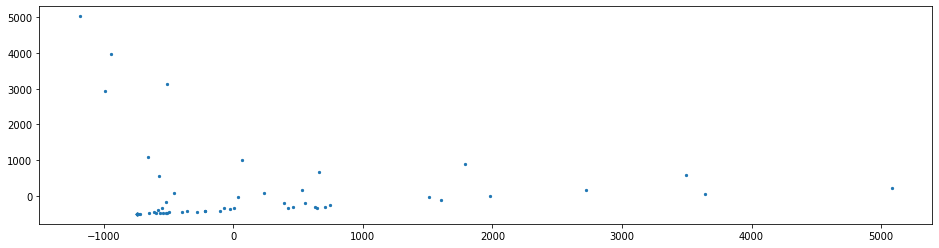

In [70]:
plt.figure(figsize = (16,4))
plt.scatter(pcadf.PCA1,pcadf.PCA2,s=5)
plt.show()

In [71]:
Kmean = KMeans(n_clusters=6)
Kmean.fit(pcadf)
pcadf['Clusters'] = Kmean.predict(pcadf)
pcadf['Clusters'].value_counts()

4    37
0    15
3     5
5     4
1     4
2     3
Name: Clusters, dtype: int64

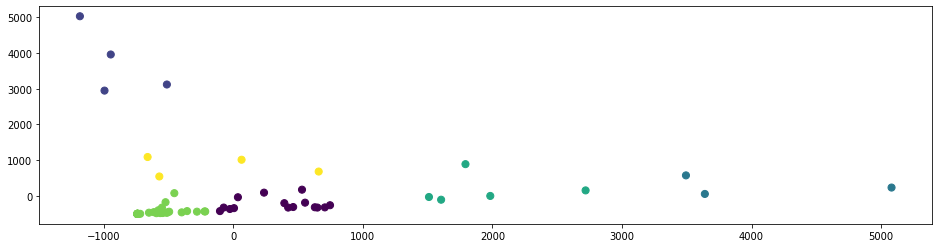

In [72]:
plt.figure(figsize = (16,4))
plt.scatter(pcadf.PCA1,pcadf.PCA2,s=50,c = Kmean.labels_)
plt.show()

In [73]:
data['clusters'] = pcadf.Clusters

In [79]:
#Wrong GRR CLuster
data[data['clusters'] == 1]

,Plant,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,% Issues to Cost Center,% FinishedGoods-Without-QC,% Forced QC,% Verified FMFO compliance in dispatch of Finished Goods,% Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count,clusters
62,UBJ,3.400000,3.93,0.882353,1.0,15,3.0,18.0,15.0,3451.0,0.001345,0.008523,0.002605,0.004137,0.125637,0.83,180,1
63,UDQ,4.229898,2.53,0.750000,1.0,187,1.0,147.0,46.0,4447.0,0.016765,0.002841,0.021274,0.012686,0.161897,0.64,338,1
64,UDS,5.180000,2.53,0.812500,1.0,380,2.0,116.0,103.0,3561.0,0.034068,0.005682,0.016787,0.028406,0.129642,0.73,650,1
65,USM,4.229898,3.93,0.823529,0.8,46,2.0,2.0,NaN,5537.0,0.004124,0.005682,0.000289,NaN,0.201580,0.83,253,1


In [88]:
#test coverage ratio highest
data[data['clusters'] == 3]

,Plant,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,% Issues to Cost Center,% FinishedGoods-Without-QC,% Forced QC,% Verified FMFO compliance in dispatch of Finished Goods,% Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count,clusters
39,UTR,3.99,4.73,0.941176,1.0,54,12.0,88.0,209.0,216.0,0.004841,0.034091,0.012735,0.057639,0.007864,0.92,3511,3
40,U571,3.27,4.73,0.800000,0.8,241,0.0,3.0,57.0,100.0,0.021607,NaN,0.000434,0.015720,0.003641,0.80,2368,3
41,UHA,3.89,2.53,0.941176,1.0,401,4.0,460.0,800.0,1057.0,0.035951,0.011364,0.066570,0.220629,0.038481,0.92,2609,3
42,UKN,3.89,2.00,0.823529,1.0,425,7.0,697.0,129.0,157.0,0.038103,0.019886,0.100868,0.035576,0.005716,0.75,2715,3
43,UPY,4.26,6.07,0.882353,1.0,1069,9.0,999.0,98.0,191.0,0.095840,0.025568,0.144573,0.027027,0.006954,0.83,2190,3
